# Module 3- Regression & Beta Calculation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as spo
from sklearn import datasets, linear_model, metrics 

In [2]:
# To increase the size of plots

plt.rcParams['figure.figsize'] = (24, 13.5)

## Please double click on the plot image to enlarge it.

# Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

* Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
      
* Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [3]:
# Importing the data

data = pd.read_csv('GOLD.csv', index_col = 'Date', parse_dates = True)
df = pd.DataFrame(data)
df

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
2017-05-11,28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
2017-05-12,28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
2017-05-15,28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
2017-05-16,28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


## Visualizing The Data

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


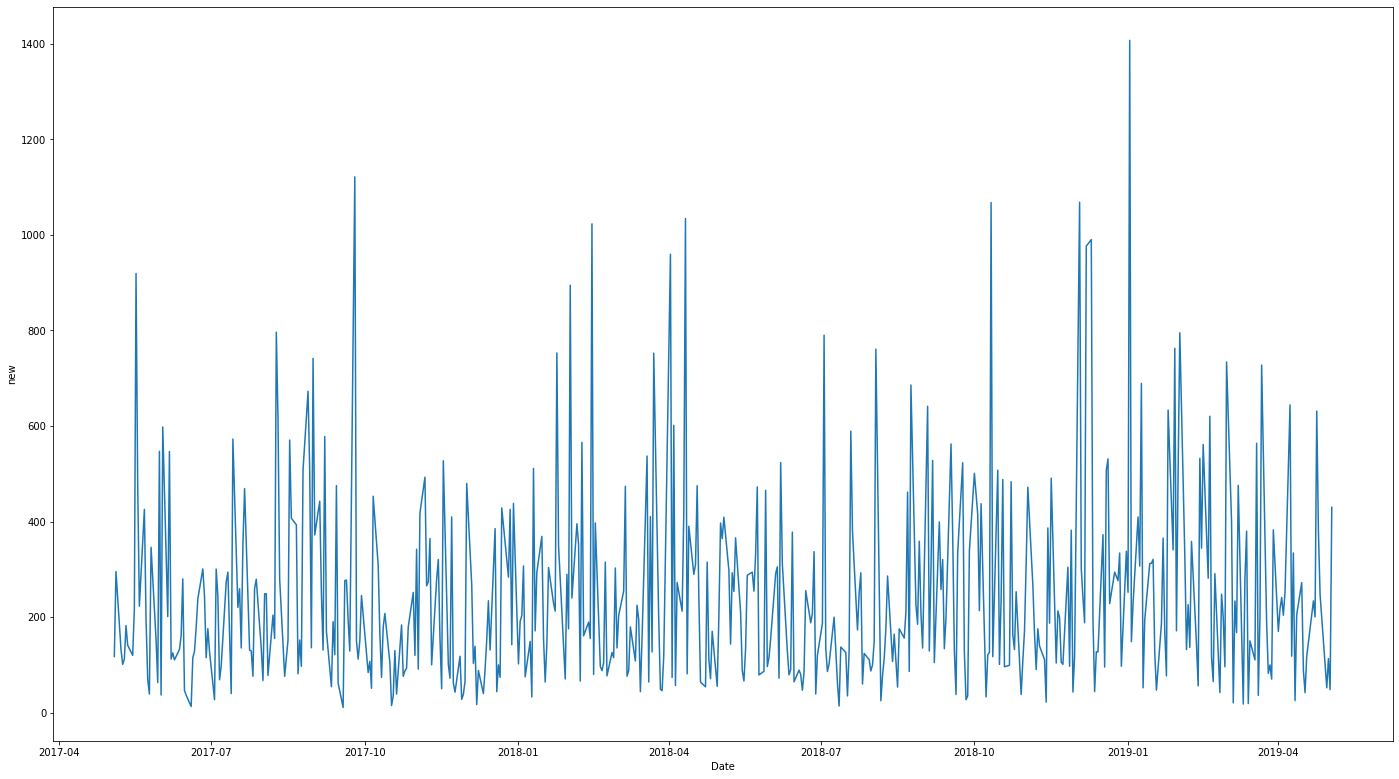

In [4]:
plt.plot( df['new'])
plt.xlabel('Date')
plt.ylabel('new')
plt.show()

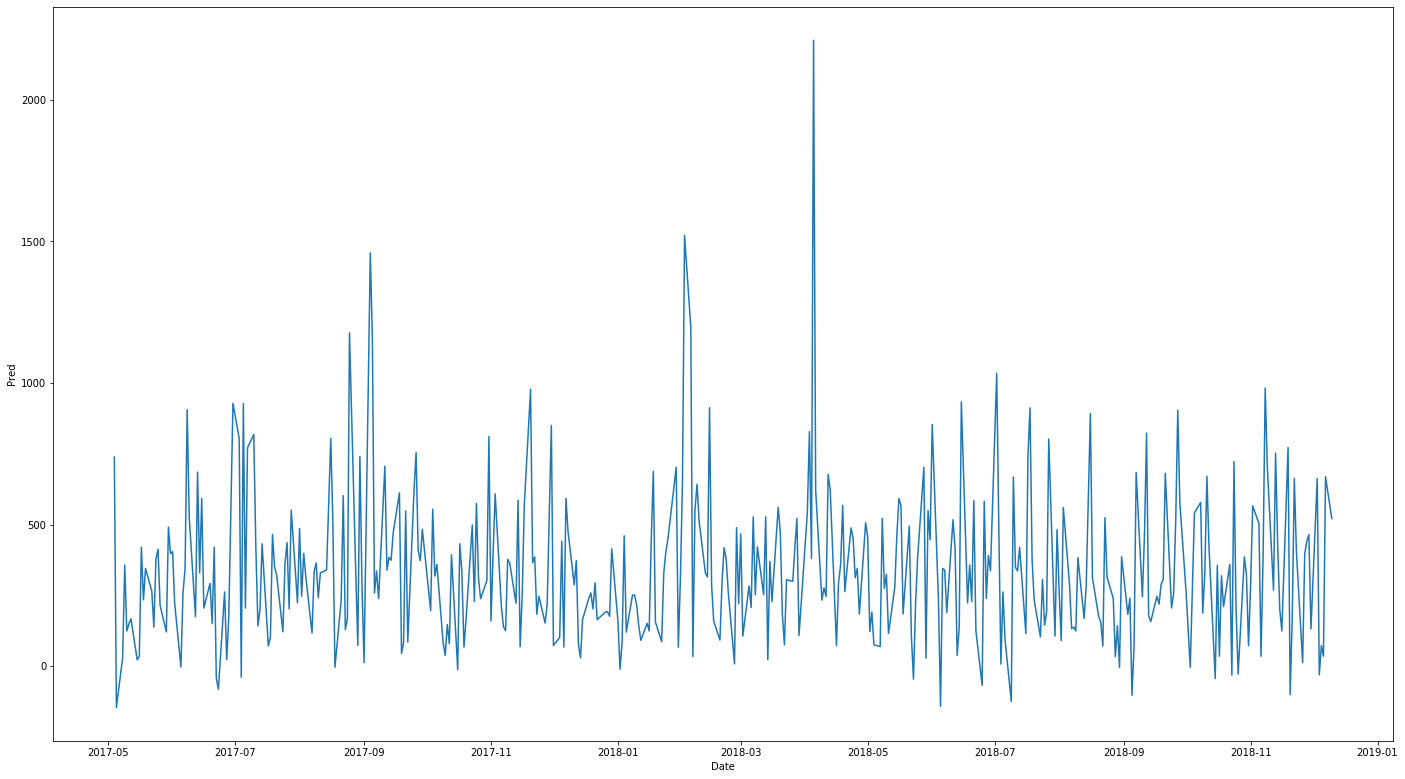

In [5]:
plt.plot( df['Pred'])
plt.xlabel('Date')
plt.ylabel('Pred')
plt.show()

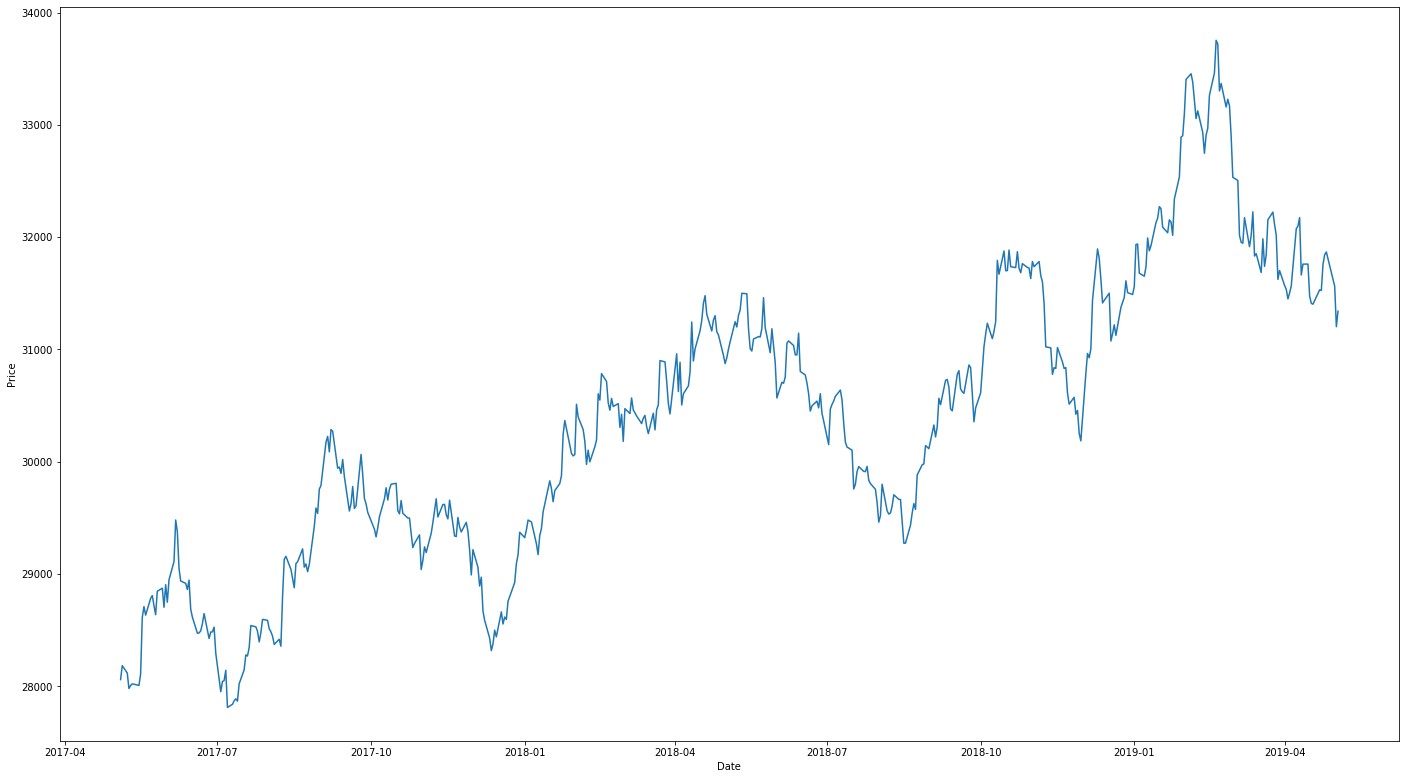

In [6]:
plt.plot( df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

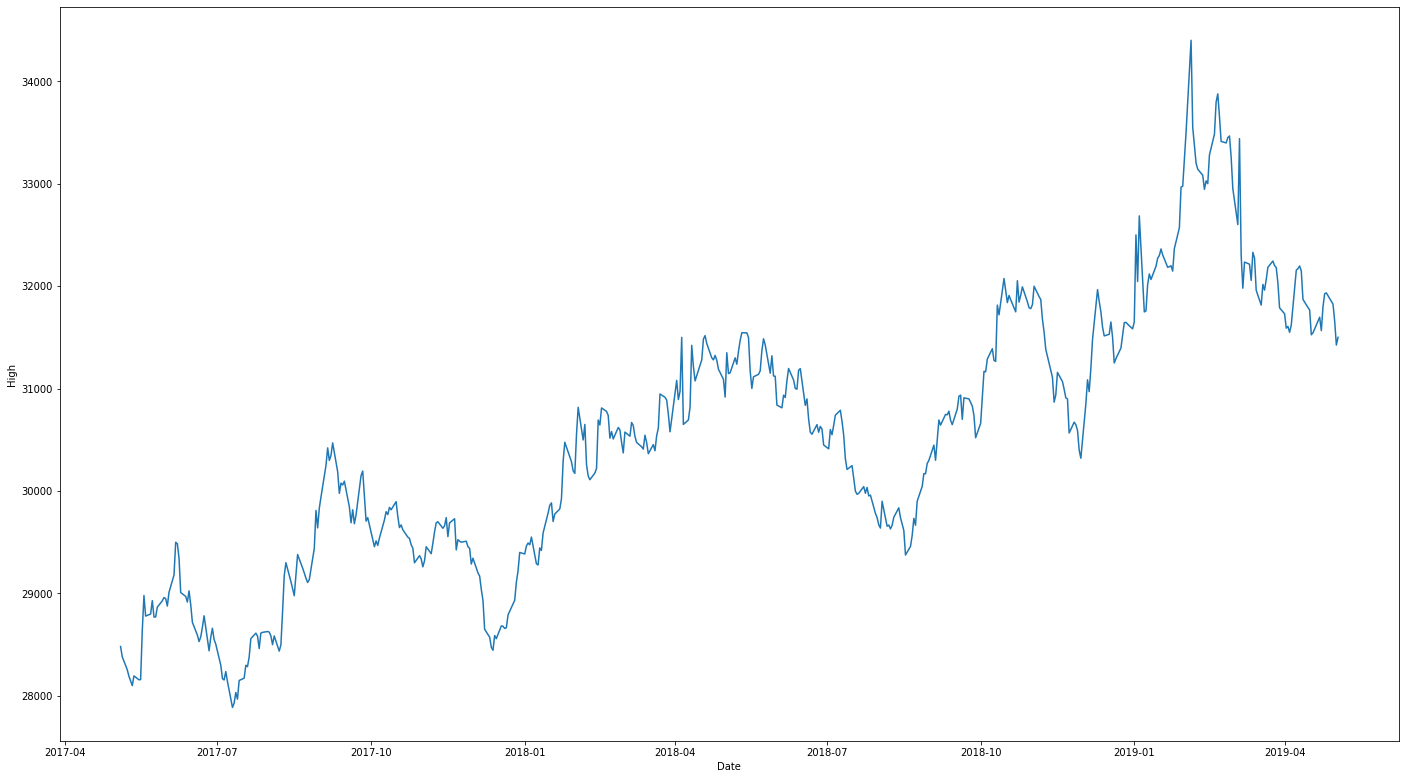

In [7]:
plt.plot( df['High'])
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

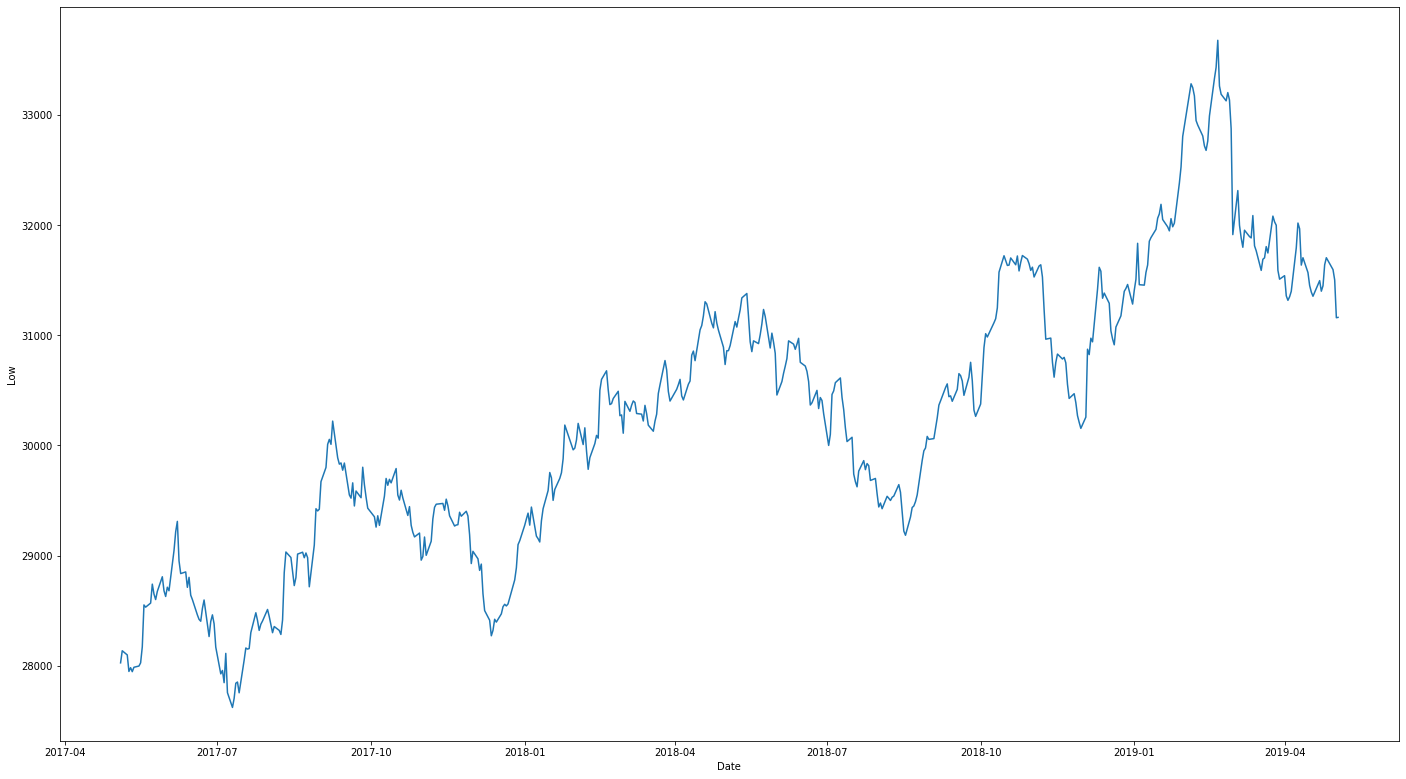

In [8]:
plt.plot( df['Low'])
plt.xlabel('Date')
plt.ylabel('Low')
plt.show()

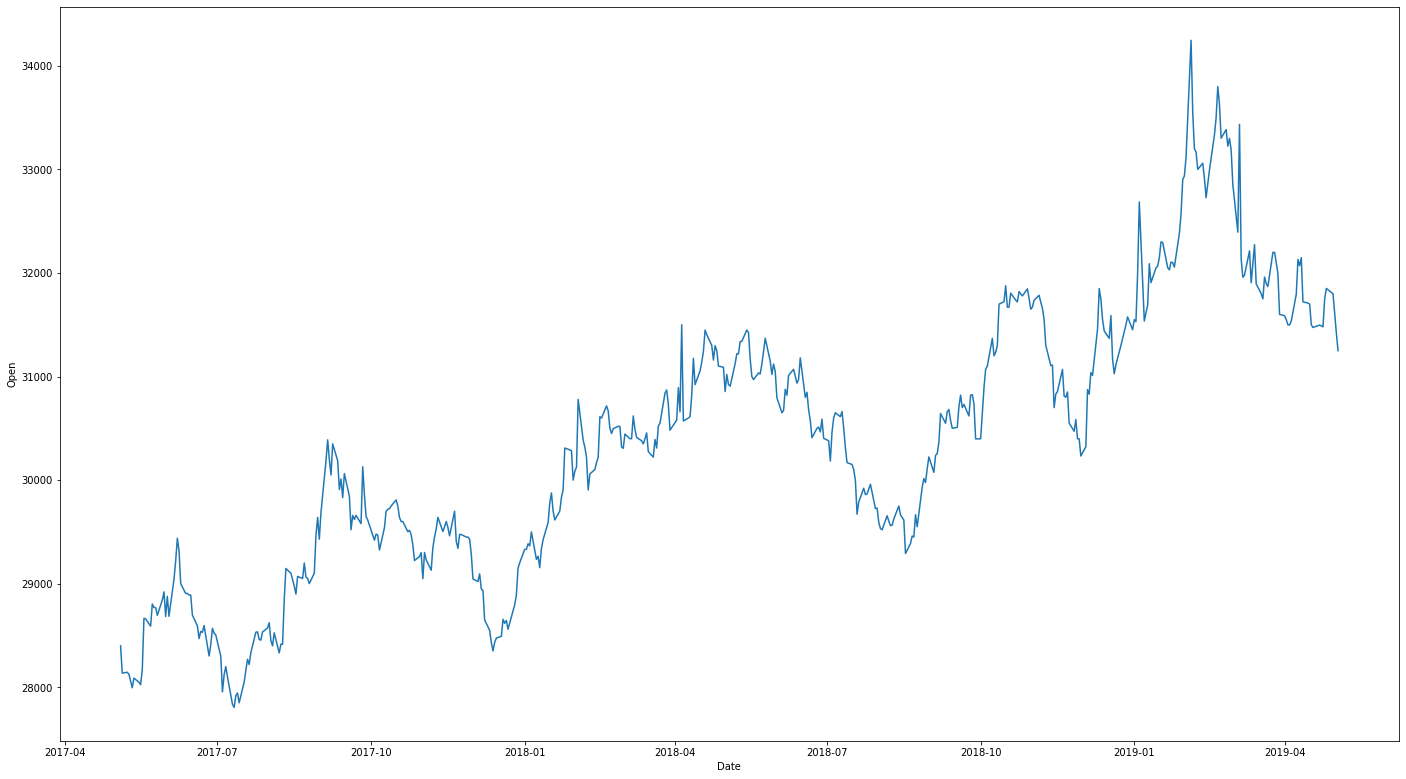

In [9]:
plt.plot( df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

## Using Linear Regression to find out Coeficcients

In [10]:
## Finding places where values are NaN

df.isnull().sum()

Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [11]:
## Checking 
df.tail(102)

## NOTE: See That allthe pred values are NaN after 1st one

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2018-12-10,31895,31459,31966,31420,14.09K,1.45%,521.0,990.254297
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
2018-12-17,31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
2018-12-18,31075,31589,31650,31041,10.18K,-1.35%,NaN,95.667053
2018-12-19,31139,31167,31500,30967,8.76K,0.21%,NaN,507.960442
2018-12-20,31219,31027,31250,30914,12.97K,0.26%,NaN,531.315003


In [12]:
## Removing NaN

final  = df.head(df['Price'].size - 101)
final

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
2017-05-11,28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
2017-05-12,28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
2017-05-15,28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
2017-05-16,28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


In [13]:
### For x
opn = np.array(final['Open'])
high = np.array(final['High'])
low = np.array(final['Low'])
close = np.array(final['Price'])
dat = [ final['Open'], final['High'], final['Low'], final['Price']]
x = np.array(dat)
X = x.T

### For y
pred = np.array(final['Pred'])
y = pred

In [14]:
print(X.shape)
print(y.shape)

(411, 4)
(411,)


In [15]:
##  Using Linear regression to find coeficients

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# create linear regression object 
reg = linear_model.LinearRegression() 

# train the model using the training sets 
reg.fit(X_train, y_train) 

# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 


Coefficients: 
 [ 3. -1. -4.  2.]
Variance score: 1.0


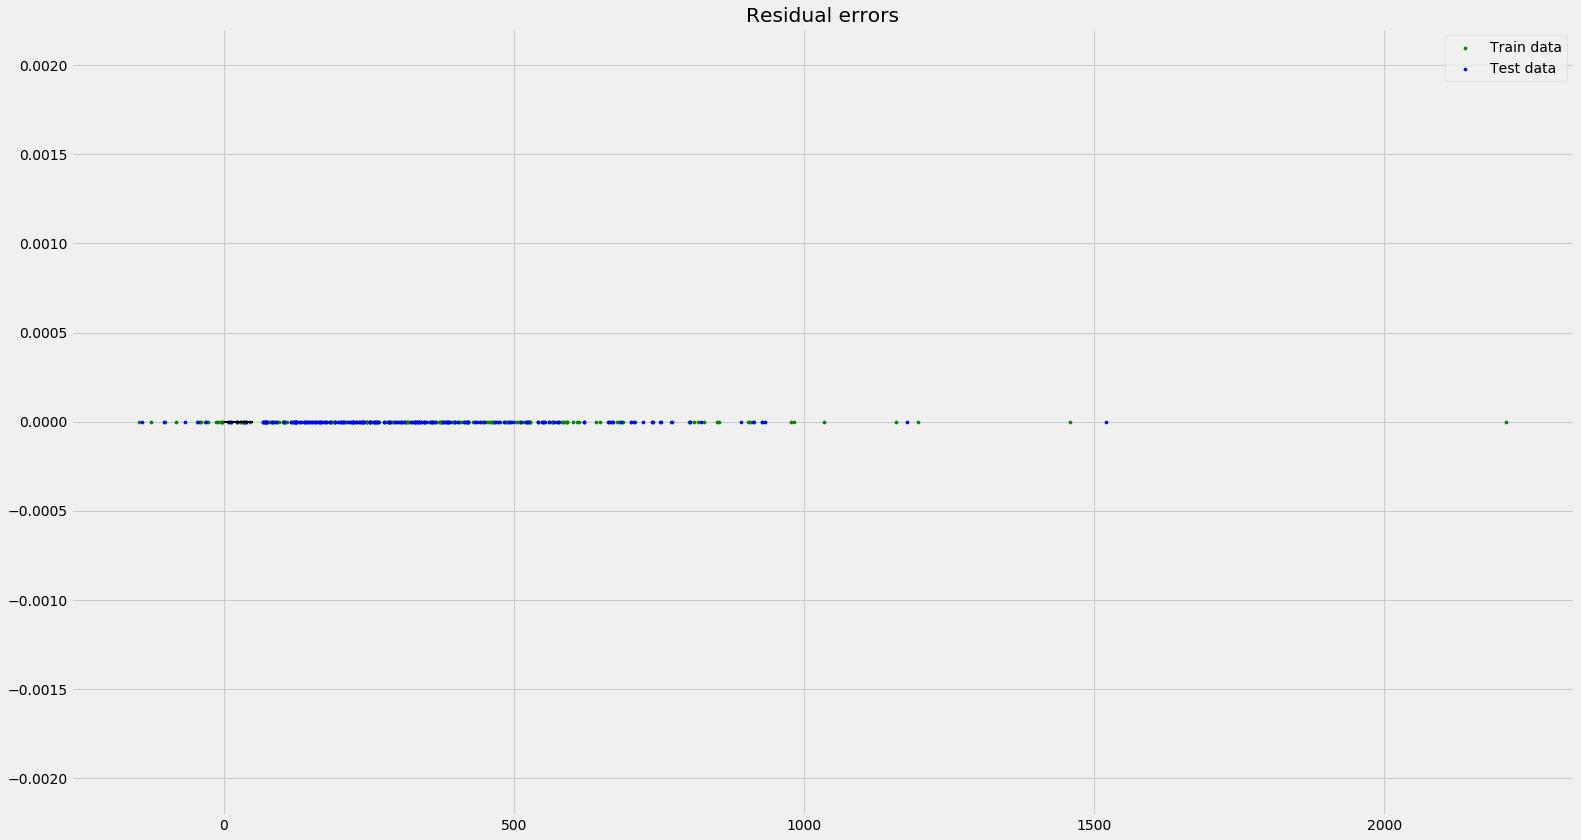

In [16]:
## Visualizing the result

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 

## RESULT
### The 'Pred' column is a linear Combination of OHLC prices
### And the coefficients are [ 3. -1. -4.  2.]

# ------------------------------------------------------------------------------------------------------

## PREDICTION
### Predicting the NaN values of "Pred" column

In [17]:
predict = df.tail(101)
predict

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
2018-12-17,31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
2018-12-18,31075,31589,31650,31041,10.18K,-1.35%,NaN,95.667053
2018-12-19,31139,31167,31500,30967,8.76K,0.21%,NaN,507.960442
2018-12-20,31219,31027,31250,30914,12.97K,0.26%,NaN,531.315003
2018-12-21,31126,31115,31292,31075,9.91K,-0.30%,NaN,228.356138


In [18]:
o = 3
h = -1
l = -4
c = 2

dft = df.tail(101)

In [19]:
dft

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
2018-12-17,31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
2018-12-18,31075,31589,31650,31041,10.18K,-1.35%,NaN,95.667053
2018-12-19,31139,31167,31500,30967,8.76K,0.21%,NaN,507.960442
2018-12-20,31219,31027,31250,30914,12.97K,0.26%,NaN,531.315003
2018-12-21,31126,31115,31292,31075,9.91K,-0.30%,NaN,228.356138


In [20]:
dft['Pred'] = (dft['Open']*o + dft['High']*h + dft['Low']*l + dft['Price']*c)
dft

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,852,195.423493
2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,422,44.232664
2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,530,127.646233
2018-12-14,31437,31440,31514,31384,6.75K,0.07%,144,127.219539
2018-12-17,31501,31369,31530,31291,5.97K,0.20%,415,372.603976
2018-12-18,31075,31589,31650,31041,10.18K,-1.35%,1103,95.667053
2018-12-19,31139,31167,31500,30967,8.76K,0.21%,411,507.960442
2018-12-20,31219,31027,31250,30914,12.97K,0.26%,613,531.315003
2018-12-21,31126,31115,31292,31075,9.91K,-0.30%,5,228.356138


## Please Compare the two "dft['Pred']" outputs above

# ---------------------------------------------------------------------------------------------------

# Trying to fit a Linear Model to "new" column

In [21]:
### For x
opn = np.array(df['Open'])
high = np.array(df['High'])
low = np.array(df['Low'])
close = np.array(df['Price'])
dat = [ df['Open'], df['High'], df['Low'], df['Price']]
x = np.array(dat)
X = x.T

### For y
new = np.array(df['new'])
y = new

In [22]:
print(X.shape)
print(y.shape)

(512, 4)
(512,)


In [23]:
##  Using Linear regression to find coeficients

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# create linear regression object 
reg = linear_model.LinearRegression() 

# train the model using the training sets 
reg.fit(X_train, y_train) 

# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 


Coefficients: 
 [-1.0002007   1.00450834 -1.01853994  1.01415219]
Variance score: 0.9999914796323017


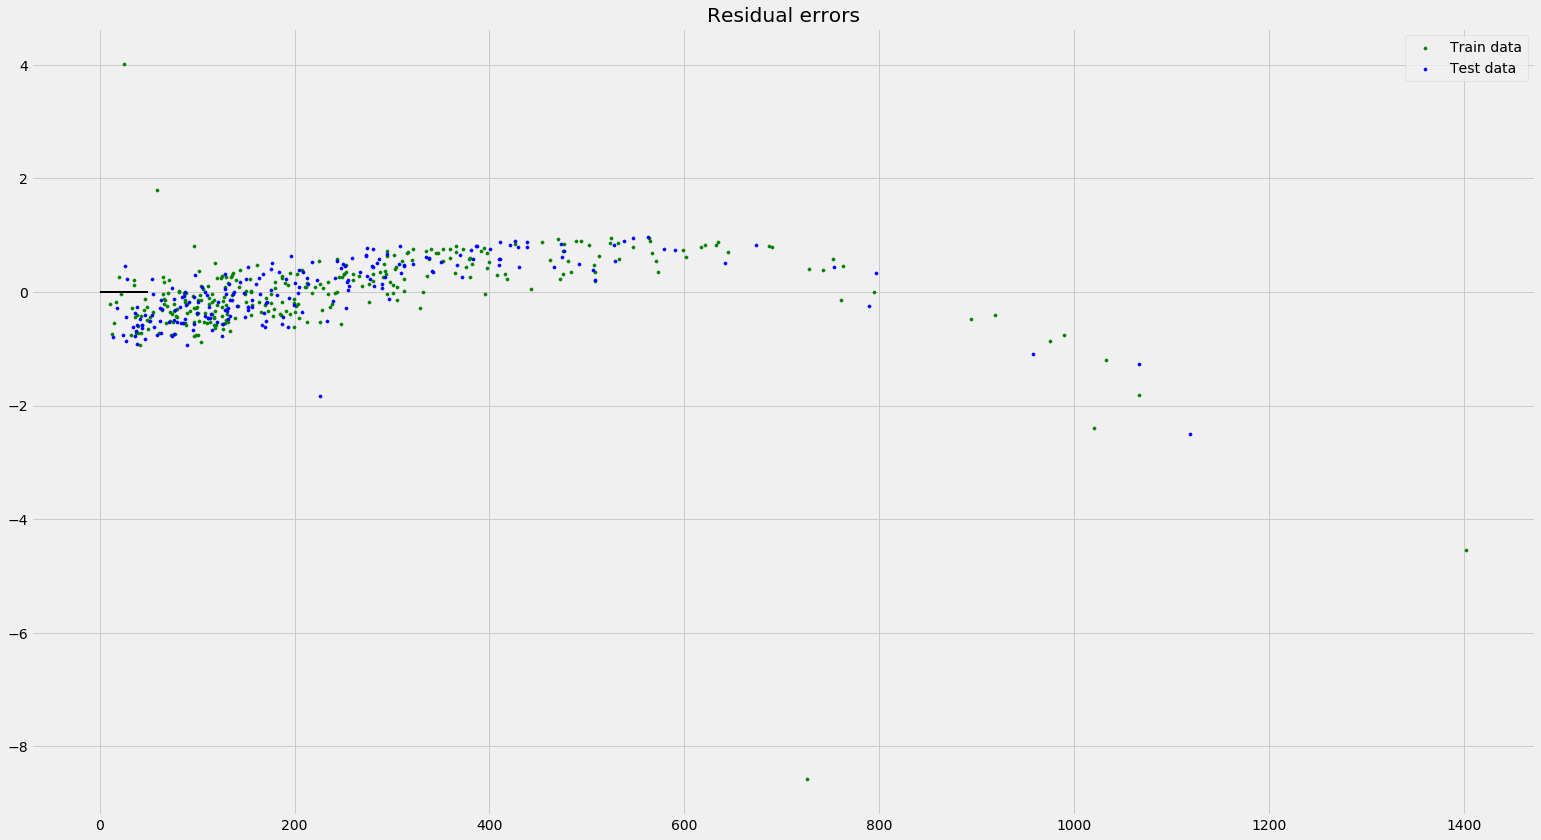

In [24]:
## Visualizing the result

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 

## PREDICTION
### Predicting the "new" column using coefficients [-1.0002007   1.00450834 -1.01853994  1.01415219]

In [25]:
on = -1.0002007
hn = 1.00450834
ln = -1.01853994
cn = 1.01415219

In [26]:
df['new']

Date
2017-05-04    117.570740
2017-05-05    295.430176
2017-05-08    132.123714
2017-05-09    101.298064
2017-05-10    112.153318
2017-05-11    182.427089
2017-05-12    141.255137
2017-05-15    120.069010
2017-05-16    218.401641
2017-05-17    919.376358
2017-05-18    475.389093
2017-05-19    222.895307
2017-05-22    425.738484
2017-05-23    194.449548
2017-05-24     69.289005
2017-05-25     39.225874
2017-05-26    346.158401
2017-05-29    152.281425
2017-05-30     63.234310
2017-05-31    547.115621
2017-06-01     37.212629
2017-06-02    598.104568
2017-06-05    201.306765
2017-06-06    546.566915
2017-06-07    112.394063
2017-06-08    125.333702
2017-06-09    110.611943
2017-06-12    132.274514
2017-06-13    161.078158
2017-06-14    280.114923
                 ...    
2019-03-21    201.292020
2019-03-22    727.589391
2019-03-25    186.706916
2019-03-26     82.432643
2019-03-27    100.108062
2019-03-28     70.458580
2019-03-29    382.702761
2019-04-01    170.166889
2019-04-02    217.29

In [27]:
n_new = (df['Open']*on + df['High']*hn + df['Low']*ln + df['Price']*cn)

In [28]:
n_new

Date
2017-05-04    117.235293
2017-05-05    294.552922
2017-05-08    130.763182
2017-05-09    100.311159
2017-05-10    110.854420
2017-05-11    181.539802
2017-05-12    140.165375
2017-05-15    118.642272
2017-05-16    217.547819
2017-05-17    918.136777
2017-05-18    474.873975
2017-05-19    222.264235
2017-05-22    425.791150
2017-05-23    193.503727
2017-05-24     68.198266
2017-05-25     37.979137
2017-05-26    346.012842
2017-05-29    151.178752
2017-05-30     62.256064
2017-05-31    547.067415
2017-06-01     35.934273
2017-06-02    598.000641
2017-06-05    200.215875
2017-06-06    546.684894
2017-06-07    111.349090
2017-06-08    124.770078
2017-06-09    109.880299
2017-06-12    131.152954
2017-06-13    160.721815
2017-06-14    279.718285
                 ...    
2019-03-21    200.105987
2019-03-22    727.157961
2019-03-25    186.118207
2019-03-26     81.322467
2019-03-27     98.505619
2019-03-28     69.834747
2019-03-29    382.442362
2019-04-01    168.707767
2019-04-02    216.98

In [29]:
## Finding the difference between actual and predicted values

print(df['new']- n_new)

Date
2017-05-04    0.335448
2017-05-05    0.877254
2017-05-08    1.360533
2017-05-09    0.986905
2017-05-10    1.298898
2017-05-11    0.887287
2017-05-12    1.089761
2017-05-15    1.426737
2017-05-16    0.853823
2017-05-17    1.239581
2017-05-18    0.515118
2017-05-19    0.631072
2017-05-22   -0.052666
2017-05-23    0.945820
2017-05-24    1.090739
2017-05-25    1.246737
2017-05-26    0.145559
2017-05-29    1.102673
2017-05-30    0.978245
2017-05-31    0.048207
2017-06-01    1.278356
2017-06-02    0.103926
2017-06-05    1.090890
2017-06-06   -0.117979
2017-06-07    1.044974
2017-06-08    0.563623
2017-06-09    0.731645
2017-06-12    1.121560
2017-06-13    0.356343
2017-06-14    0.396637
                ...   
2019-03-21    1.186034
2019-03-22    0.431431
2019-03-25    0.588709
2019-03-26    1.110176
2019-03-27    1.602444
2019-03-28    0.623833
2019-03-29    0.260399
2019-04-01    1.459121
2019-04-02    0.314761
2019-04-03    0.592298
2019-04-04    0.450104
2019-04-05    0.364507
2019-0

## You can see that the difference is not zero in all places between actual and predicted values of "new" column

# Result
## *** "Pred" is a linear combination of OHLC prices
## *** "new" is a polynomial combination of OHLC prices

# ----------------------------------------------------------------------------------------------------------

# Query 3.2

Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
    * The daily Beta value for the past 3 months. (Daily= Daily returns)
    * The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula.   
Attempt the question using regression.(Regression Reference)   
Were the Beta values more or less than 1 ? What if it was negative ?   
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [82]:
# loading nifty50 data

nif = pd.read_csv('Nifty50/Nifty50.csv', index_col = 'Date', parse_dates = True)
nifty = pd.DataFrame(nif)
nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26


In [83]:
# Adiing Market Return Column

nifty['Market Return'] = nifty['Close'].pct_change()*100
nifty = nifty.fillna(0)
nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Market Return
Date,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.109781
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,-0.552009
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.272742
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,1.593923


In [84]:
# Loading M&M data

m_m = pd.read_csv('week2.csv', index_col = 'Date', parse_dates = True)
mm = pd.DataFrame(m_m)
mm.drop('Unnamed: 0', axis = 1, inplace = True)
mm

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,2017,5,15,0.000000,Slight or No change
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,2017,5,16,-0.676044,Slight negative
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,2017,5,17,0.911187,Slight positive
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,2017,5,18,-1.882071,Negative
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,2017,5,19,-1.437706,Negative
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,2017,5,22,-2.036148,Negative
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17,2017,5,23,1.952153,Positive
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10,2017,5,24,-1.734560,Negative
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23,2017,5,25,1.440416,Positive


## 3.2.1. Calculating Daily Beta value for Past 3 month

In [85]:
## Data For past 3 months (Taking each trading month of 23 days)

market_change = nifty['Market Return'].tail(23*3)
stock_change = mm['Day_Perc_Change'].tail(23*3)

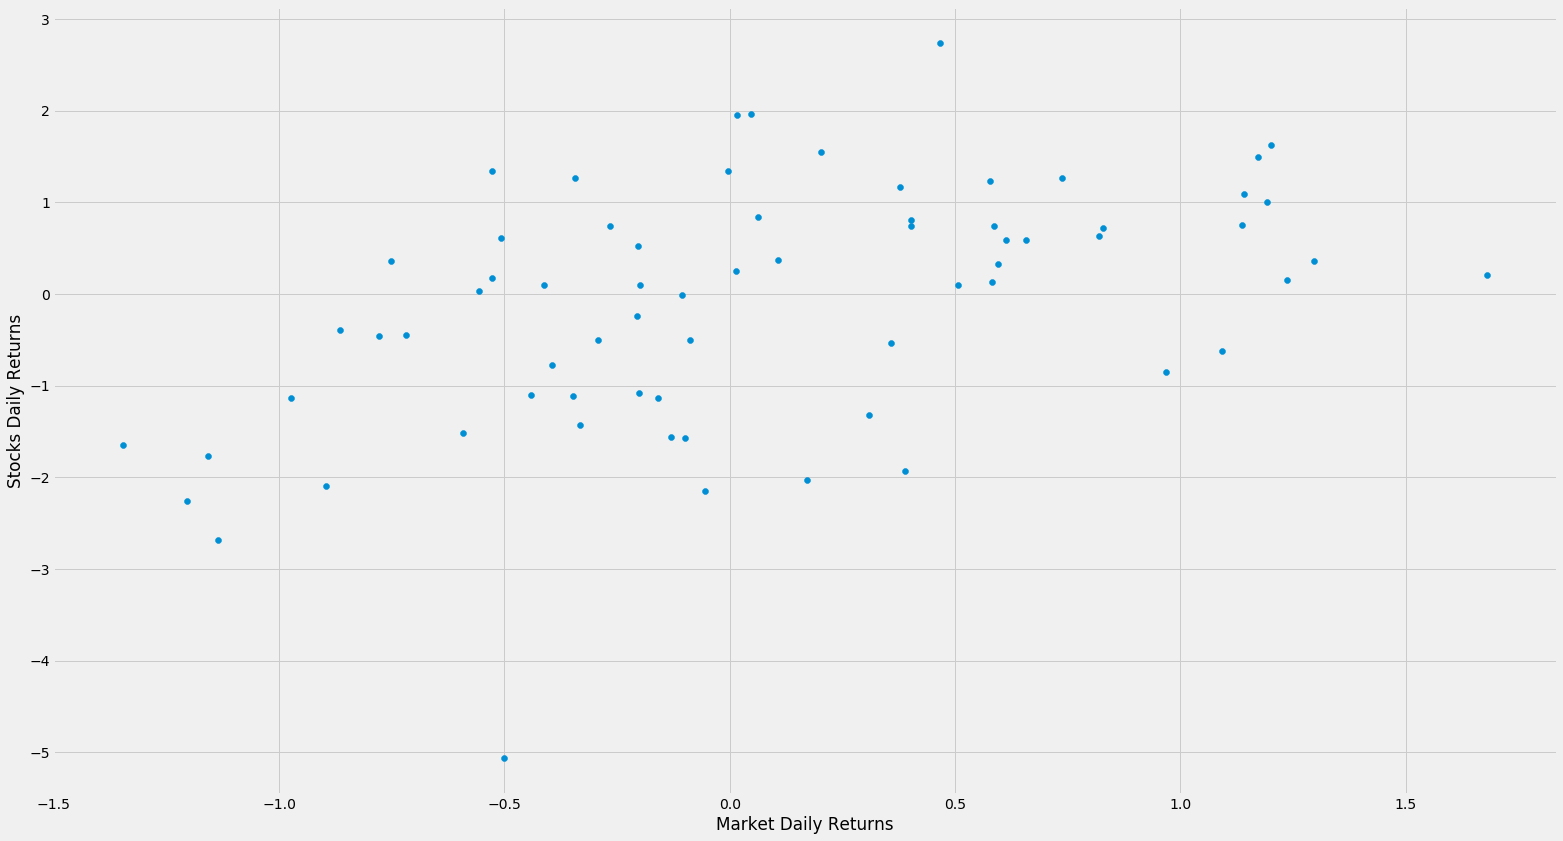

In [86]:
## Plotting the Data

plt.scatter(market_change, stock_change)
plt.ylabel('Stocks Daily Returns')
plt.xlabel('Market Daily Returns')
plt.show()


### Doing Linear Regression to find Beta and Alpha

In [87]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    beta = SS_xy / SS_xx 
    alpha = m_y - beta*m_x 
  
    return(alpha, beta) 

In [111]:
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('Market Returns') 
    plt.ylabel('Stocks Returns') 
  
    # function to show plot 
    plt.show() 

Estimated coefficients:
alpha = -0.17724517675691676  \ 
beta = 0.916957913774787


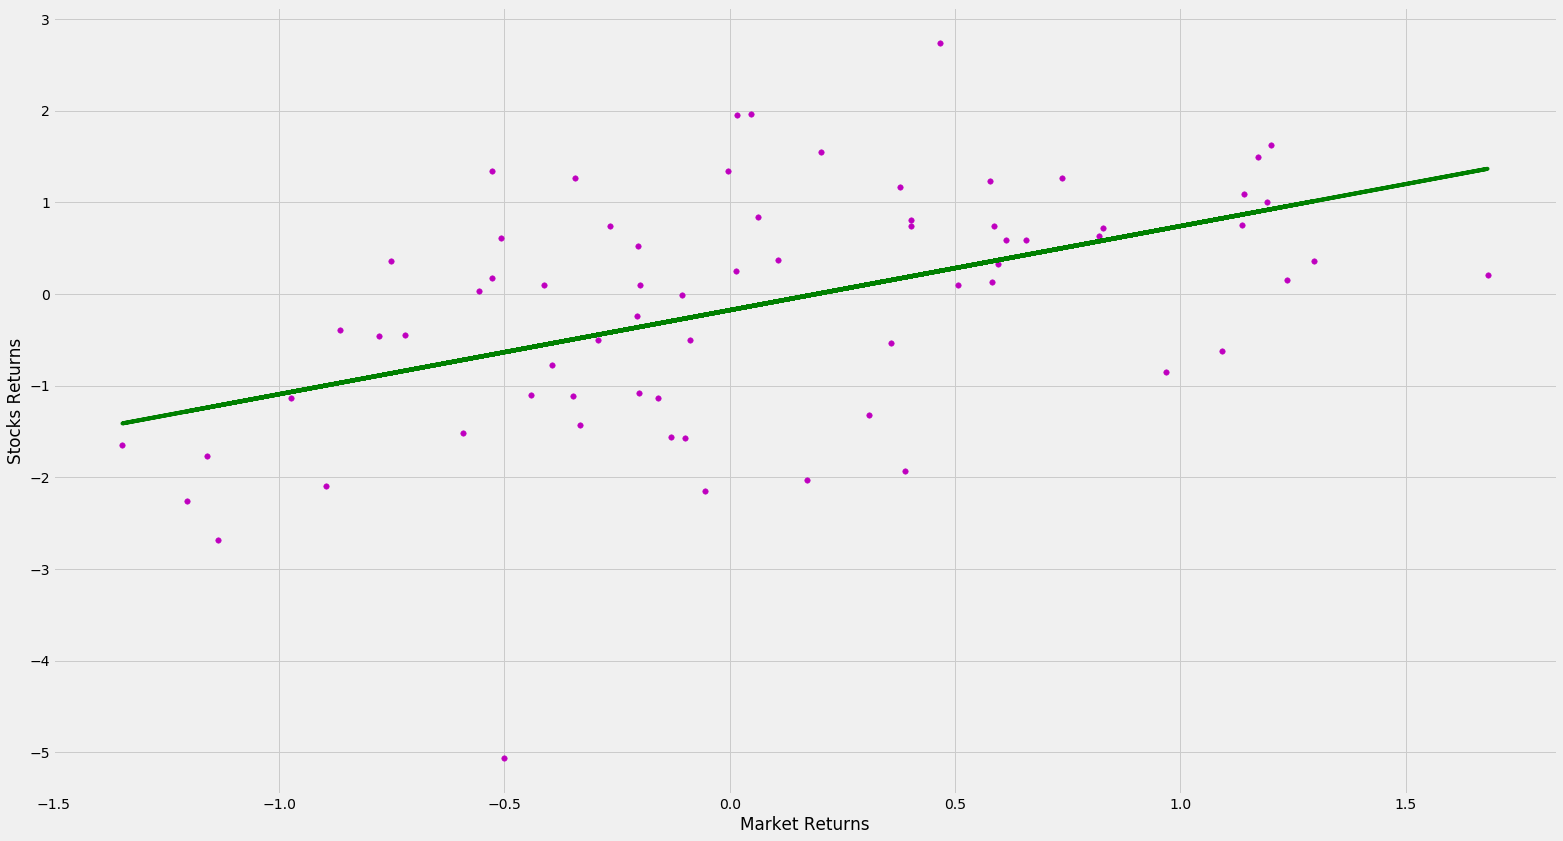

In [112]:
def main(): 
    # observations 
    x = np.array(market_change) 
    y = np.array(stock_change) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nalpha = {}  \ \nbeta = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

### ANSWER: The beta value for Daily Return for past 3 month is ---> *__0.916957913774787__* 	

# -----------------------------------------------------------------------------------------------------------

## 3.2.2. Calculating monthly Beta value. (Monthly= Monthly returns)

In [113]:
###### Calculating the data for Monthly returns for Stocks and Market

## For Stocks

mm['month_change'] = mm['month'].pct_change()
mm = mm.fillna(0)
mm

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,month_change
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,2017,5,15,0.000000,Slight or No change,0.000000
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,2017,5,16,-0.676044,Slight negative,0.000000
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,2017,5,17,0.911187,Slight positive,0.000000
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,2017,5,18,-1.882071,Negative,0.000000
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,2017,5,19,-1.437706,Negative,0.000000
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,2017,5,22,-2.036148,Negative,0.000000
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17,2017,5,23,1.952153,Positive,0.000000
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10,2017,5,24,-1.734560,Negative,0.000000
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23,2017,5,25,1.440416,Positive,0.000000


In [114]:
month_mm = mm[mm.month_change != 0]
month_mm

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,month_change
Date,,,,,,,,,,,,,,,,,,,,
2017-06-01,M&amp;M,EQ,1416.95,1430.00,1441.00,1416.10,1426.65,1425.25,1429.30,1712339,2.447443e+09,55540,1120694,65.45,2017,6,1,0.585765,Slight positive,0.200000
2017-07-03,M&amp;M,EQ,1348.60,1356.00,1372.00,1343.00,1364.10,1366.45,1365.38,1023959,1.398092e+09,27860,673334,65.76,2017,7,3,1.323595,Positive,0.166667
2017-08-01,M&amp;M,EQ,1403.30,1415.00,1433.40,1403.30,1429.95,1429.25,1423.41,1941740,2.763896e+09,34253,1415781,72.91,2017,8,1,1.849213,Positive,0.142857
2017-09-01,M&amp;M,EQ,1344.80,1344.80,1351.65,1336.90,1346.80,1347.60,1344.64,1087301,1.462028e+09,44840,613120,56.39,2017,9,1,0.208209,Slight or No change,0.125000
2017-10-03,M&amp;M,EQ,1254.25,1265.00,1291.45,1252.75,1257.05,1264.30,1276.39,1785354,2.278805e+09,52181,1045836,58.58,2017,10,3,0.801276,Slight positive,0.111111
2017-11-01,M&amp;M,EQ,1344.80,1347.25,1363.20,1336.00,1352.80,1350.75,1349.99,1965358,2.653212e+09,59092,1330675,67.71,2017,11,1,0.442445,Slight or No change,0.100000
2017-12-01,M&amp;M,EQ,1406.55,1414.00,1426.95,1406.00,1409.00,1409.40,1415.77,1077343,1.525266e+09,30037,573714,53.25,2017,12,1,0.202623,Slight or No change,0.090909
2018-01-01,M&amp;M,EQ,751.10,751.00,758.90,743.00,745.50,744.65,750.77,2476302,1.859140e+09,31240,1619007,65.38,2018,1,1,-0.858741,Slight negative,-0.916667
2018-02-01,M&amp;M,EQ,763.05,768.90,802.55,763.00,801.00,798.75,785.19,6896060,5.414711e+09,122264,3297909,47.82,2018,2,1,4.678592,Among top gainers,1.000000


In [115]:
## For Nifty Scale

nifty['month'] = pd.DatetimeIndex(nifty.index).month
nifty['month_change'] = nifty['month'].pct_change()
nifty = nifty.fillna(0)
nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Market Return,month,month_change
Date,,,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000,5,0.000000
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752,5,0.000000
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922,5,0.000000
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944,5,0.000000
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438,5,0.000000
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.109781,5,0.000000
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,-0.552009,5,0.000000
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.272742,5,0.000000
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,1.593923,5,0.000000


In [116]:
month_nifty = nifty[nifty.month_change != 0]
month_nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Market Return,month,month_change
Date,,,,,,,,,
2017-06-01,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,-0.053527,6,0.200000
2017-07-03,9587.95,9624.00,9543.55,9615.00,188690599,8720.76,0.988352,7,0.166667
2017-08-01,10101.05,10128.60,10065.75,10114.65,190000516,11515.29,0.372627,8,0.142857
2017-09-01,9937.65,9983.45,9909.85,9974.40,162730656,9314.82,0.569677,9,0.125000
2017-10-03,9893.30,9895.40,9831.05,9859.50,167833406,9698.55,0.724312,10,0.111111
2017-11-01,10390.35,10451.65,10383.05,10440.50,268270466,14206.21,1.017871,11,0.100000
2017-12-01,10263.70,10272.70,10108.55,10121.80,147765528,8518.58,-1.024295,12,0.090909
2018-01-01,10531.70,10537.85,10423.10,10435.55,134532090,7546.56,-0.903549,1,-0.916667
2018-02-01,11044.55,11117.35,10878.80,11016.90,315743486,17719.40,-0.097935,2,1.000000


In [117]:
#### Npw we have the data for calculating monthly beta as month_nifty and month_mm

month_nifty["monthly_return"] = month_nifty['Close'].pct_change()
month_nifty = month_nifty.fillna(0)
month_nifty

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Market Return,month,month_change,monthly_return
Date,,,,,,,,,,
2017-06-01,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,-0.053527,6,0.200000,0.000000
2017-07-03,9587.95,9624.00,9543.55,9615.00,188690599,8720.76,0.988352,7,0.166667,-0.000114
2017-08-01,10101.05,10128.60,10065.75,10114.65,190000516,11515.29,0.372627,8,0.142857,0.051966
2017-09-01,9937.65,9983.45,9909.85,9974.40,162730656,9314.82,0.569677,9,0.125000,-0.013866
2017-10-03,9893.30,9895.40,9831.05,9859.50,167833406,9698.55,0.724312,10,0.111111,-0.011519
2017-11-01,10390.35,10451.65,10383.05,10440.50,268270466,14206.21,1.017871,11,0.100000,0.058928
2017-12-01,10263.70,10272.70,10108.55,10121.80,147765528,8518.58,-1.024295,12,0.090909,-0.030525
2018-01-01,10531.70,10537.85,10423.10,10435.55,134532090,7546.56,-0.903549,1,-0.916667,0.030997
2018-02-01,11044.55,11117.35,10878.80,11016.90,315743486,17719.40,-0.097935,2,1.000000,0.055709


In [118]:

month_mm['monthly_return'] = month_mm['Close Price'].pct_change()
month_mm = month_mm.fillna(0)
month_mm

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,day,Day_Perc_Change,Trend,month_change,monthly_return
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,M&amp;M,EQ,1416.95,1430.00,1441.00,1416.10,1426.65,1425.25,1429.30,1712339,...,55540,1120694,65.45,2017,6,1,0.585765,Slight positive,0.200000,0.000000
2017-07-03,M&amp;M,EQ,1348.60,1356.00,1372.00,1343.00,1364.10,1366.45,1365.38,1023959,...,27860,673334,65.76,2017,7,3,1.323595,Positive,0.166667,-0.041256
2017-08-01,M&amp;M,EQ,1403.30,1415.00,1433.40,1403.30,1429.95,1429.25,1423.41,1941740,...,34253,1415781,72.91,2017,8,1,1.849213,Positive,0.142857,0.045959
2017-09-01,M&amp;M,EQ,1344.80,1344.80,1351.65,1336.90,1346.80,1347.60,1344.64,1087301,...,44840,613120,56.39,2017,9,1,0.208209,Slight or No change,0.125000,-0.057128
2017-10-03,M&amp;M,EQ,1254.25,1265.00,1291.45,1252.75,1257.05,1264.30,1276.39,1785354,...,52181,1045836,58.58,2017,10,3,0.801276,Slight positive,0.111111,-0.061814
2017-11-01,M&amp;M,EQ,1344.80,1347.25,1363.20,1336.00,1352.80,1350.75,1349.99,1965358,...,59092,1330675,67.71,2017,11,1,0.442445,Slight or No change,0.100000,0.068378
2017-12-01,M&amp;M,EQ,1406.55,1414.00,1426.95,1406.00,1409.00,1409.40,1415.77,1077343,...,30037,573714,53.25,2017,12,1,0.202623,Slight or No change,0.090909,0.043420
2018-01-01,M&amp;M,EQ,751.10,751.00,758.90,743.00,745.50,744.65,750.77,2476302,...,31240,1619007,65.38,2018,1,1,-0.858741,Slight negative,-0.916667,-0.471655
2018-02-01,M&amp;M,EQ,763.05,768.90,802.55,763.00,801.00,798.75,785.19,6896060,...,122264,3297909,47.82,2018,2,1,4.678592,Among top gainers,1.000000,0.072652


### Doing Regression to find monthly beta

In [122]:
# Getting data for regression

xm = month_nifty['monthly_return']
ym = month_mm['monthly_return']

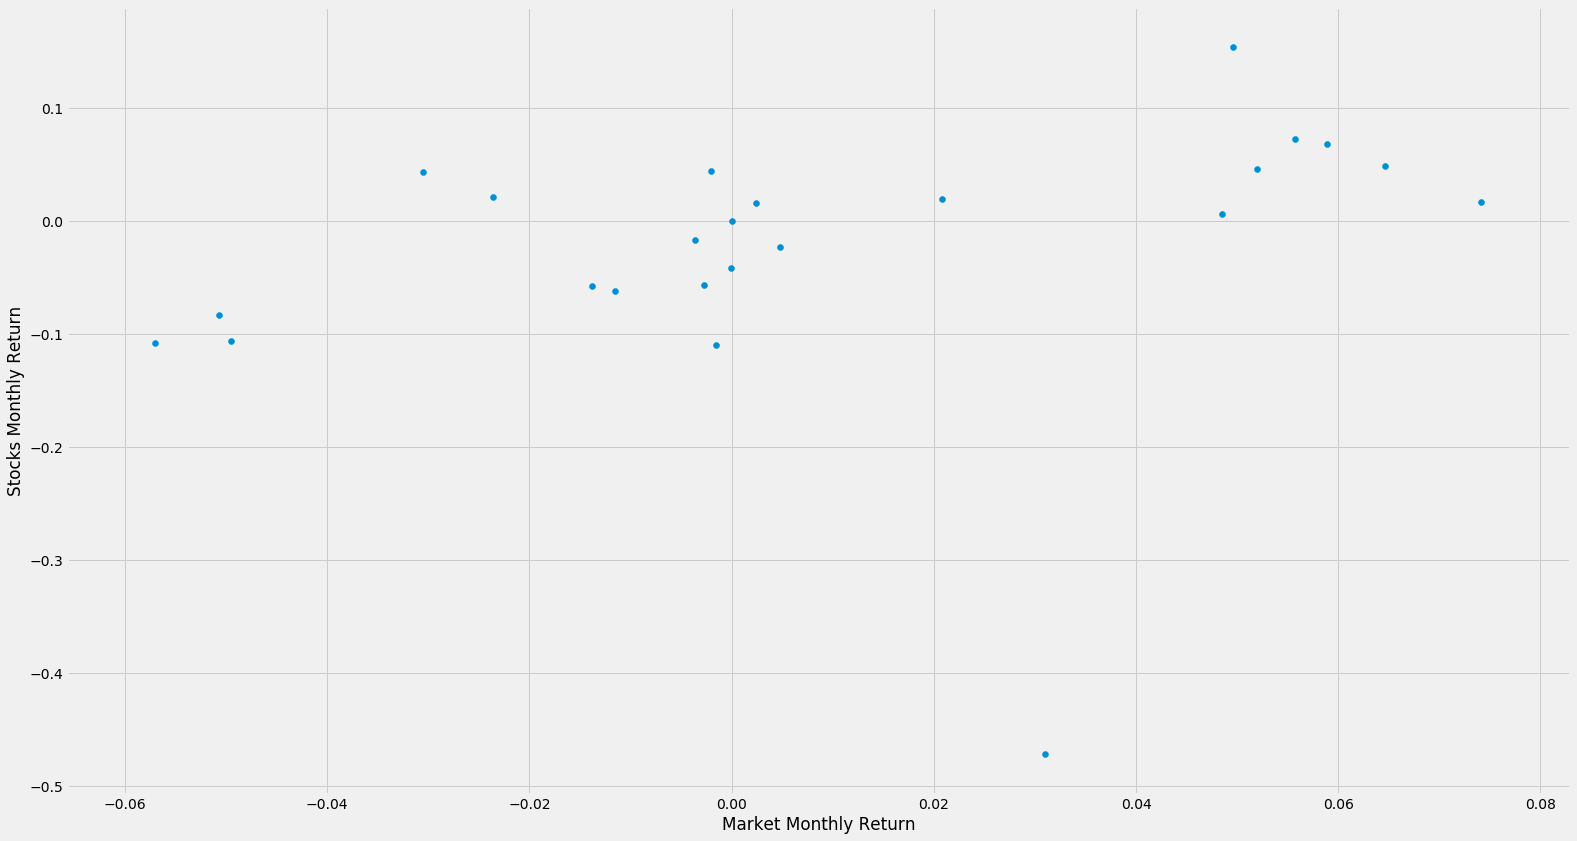

In [123]:
## Plotting the data

plt.scatter(xm, ym)
plt.xlabel('Market Monthly Return')
plt.ylabel('Stocks Monthly Return')
plt.show()

Estimated coefficients:
alpha = -0.03187944199718229  \ 
beta = 0.8780548185290399


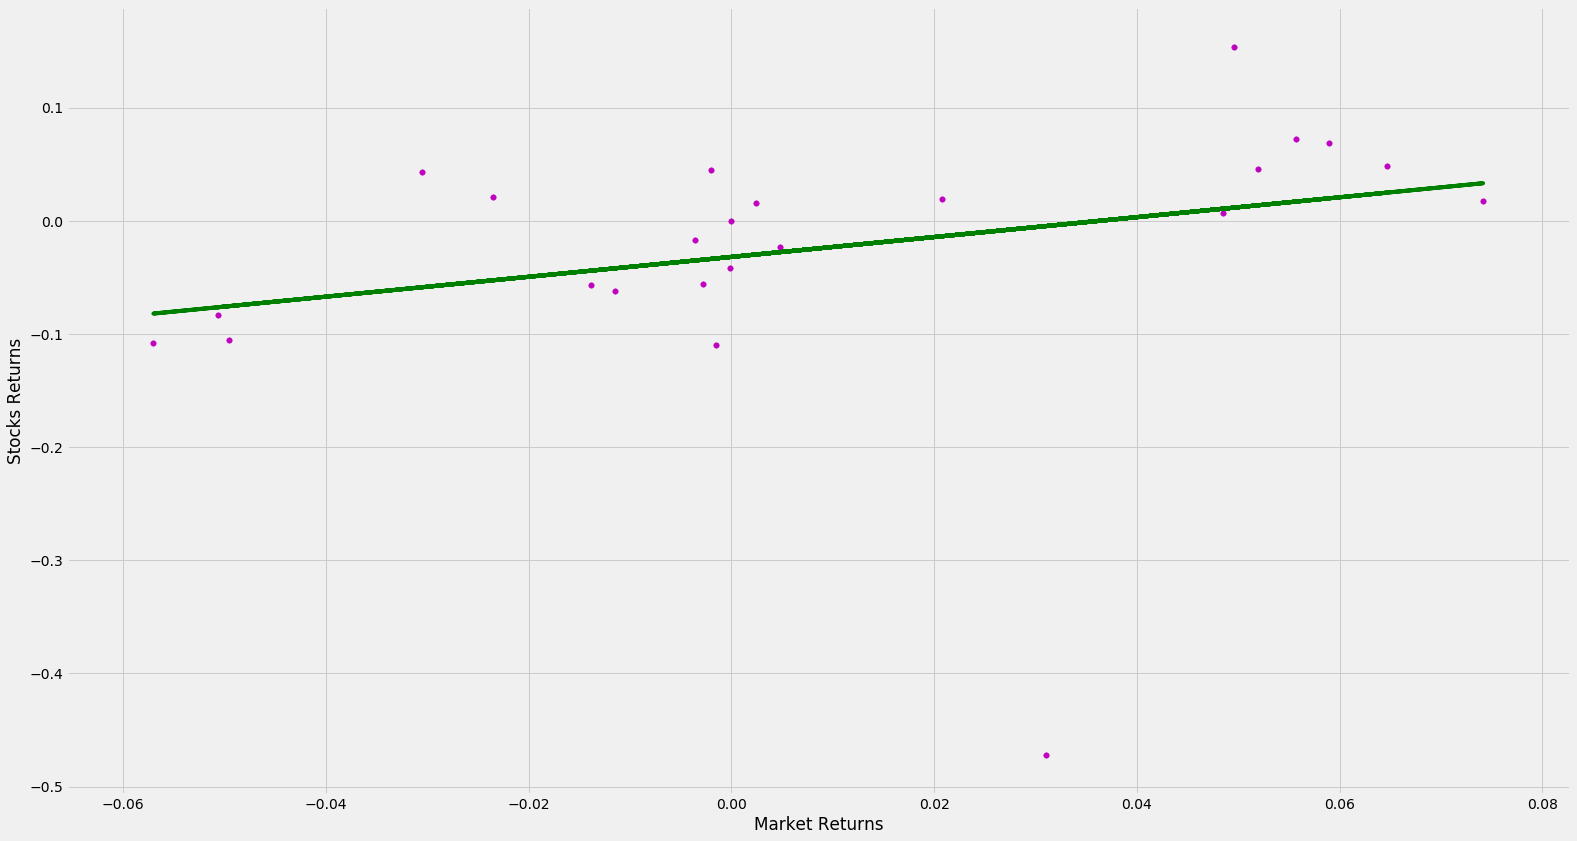

In [125]:
def monthly_main(): 
    # observations 
    x = np.array(xm) 
    y = np.array(ym) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nalpha = {}  \ \nbeta = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
monthly_main()

## ANSWER: The Monthly Beta Value is --> _*0.8780548185290399*_

# ----------------------------------------------------------------------------------------------------------

# Were the Beta values more or less than 1 ? What if it was negative ? 
# Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results.

# ANSWER

The Beta values were less than 1 for both **daily beta value** and **monthly beta value**.  

If the beta values were negative then it shows a negative correlation of stocks price change with respect to market returns.  
e.g. If a stock has negative beta then the stock price will increase when market will go down.